In [ ]:
matplotlib inline

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
df.shape

(2443651, 9)

In [5]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [6]:
df.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [8]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [17]:
#tabla de frecuencia (las 5 categorias mas cotizadas)
frecuencia_categorias = df['category'].value_counts()
frecuencia_categorias.head()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [21]:
top_categories = frecuencia_categorias.head(5).index
df_top = df[df['category'].isin(top_categories)]

In [24]:
#agrupo por categoría y calcular el precio medio de cada una
precio_promedio_por_categoria = df.groupby('category')['price'].mean()

# ordeno
categorias_mas_cotizadas = precio_promedio_por_categoria.sort_values(ascending=False).head(5)

print("Top 5 categorías de productos más cotizadas (por precio promedio):")
print(categorias_mas_cotizadas)

Top 5 categorías de productos más cotizadas (por precio promedio):
category
Laptops                  1087.987827
3D Printers              1018.036129
Desktop PCs               926.816064
Home Office Furniture     622.135898
Test & Measurement        559.382973
Name: price, dtype: float64


C:\Users\BMENDI\AppData\Local\Temp\ipykernel_21516\4057914105.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_top, x='category', palette="Set3")


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Birthday Gifts'),
  Text(2, 0, 'Bath & Body'),
  Text(3, 0, 'Beauty'),
  Text(4, 0, 'Handmade Clothing, Shoes & Accessories')])

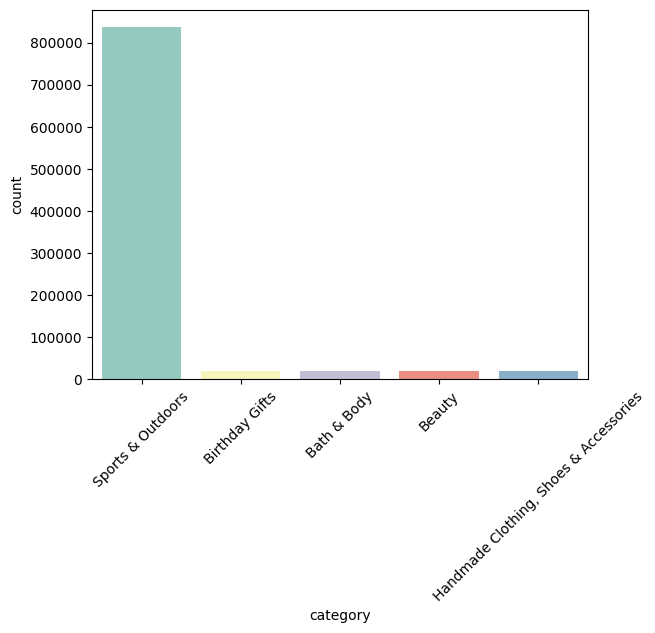

In [25]:
#grafico de barras
sns.countplot(data=df_top, x='category', palette="Set3")
plt.xticks(rotation=45)


<Axes: ylabel='count'>

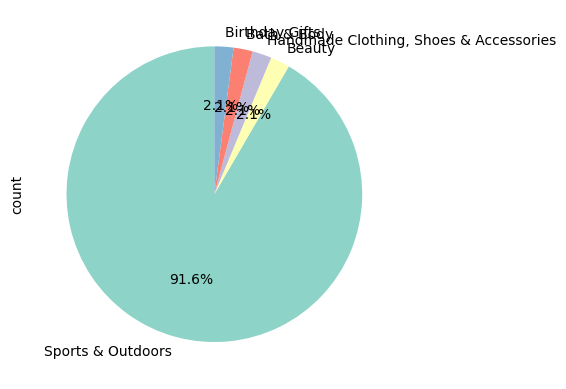

In [26]:
#pie chart
df['category'].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set3"))

### parte 2

In [28]:
#media, mediana y moda para price
media_precio = df['price'].mean()
mediana_precio = df['price'].median()
moda_precio = df['price'].mode()[0]

In [29]:
print(media_precio, mediana_precio, moda_precio)

89.24380943923663 19.09 9.99


In [30]:
#varianza, desviación estandar y rango intercuartil para price
varianza_price = df['price'].var()
desviacion_price = df['price'].std()
rango_price = df['price'].max() - df['price'].min()



In [31]:
print(varianza_price, desviacion_price, rango_price)

119445.48532254907 345.60886175349884 100000.0


In [32]:
#rango intercuartil para price
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
ric = q3 - q1

In [33]:
ric

np.float64(36.0)

<Axes: xlabel='price', ylabel='Count'>

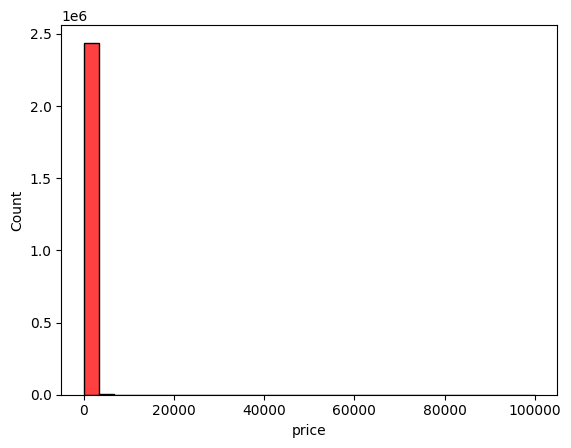

In [34]:
sns.histplot(df['price'], bins=30, color="red")

#### La mayoria de los productos estan entre 0 y 50 libras.
#### Caundo el precio aumenta, la cantidad de productos disminuye.
#### Los productos baratos son mucho mas comunes en Amazon UK.

<Axes: ylabel='price'>

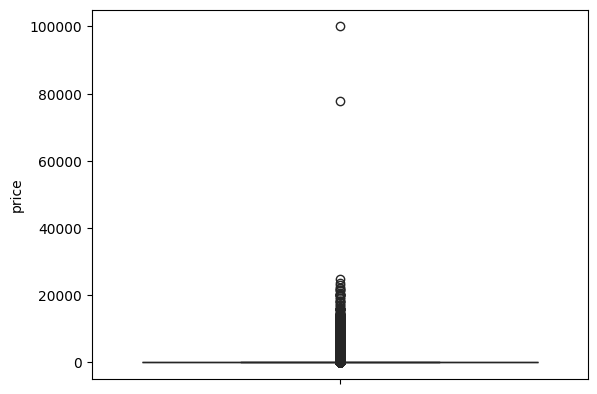

In [35]:
sns.boxplot(data=df['price'], color="green")

#### La caja (parte central) muestra que el 50% de los productos están entre aproximadamente 10 y 40 libras.
#### Hay puntos arriba que son valores atipicos (outliers): productos que cuestan mucho mas que el resto.

## PARTE 3

In [40]:
df['stars'].value_counts(dropna=False)

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [41]:
df['stars'] = df['stars'].replace(0, np.nan)

In [43]:
media_valoracion = df['stars'].mean()
mediana_valoracion = df['stars'].median()
moda_valoracion = df['stars'].mode()[0]

In [44]:
print(media_valoracion, mediana_valoracion, moda_valoracion)

4.319160762226909 4.4 4.5


In [45]:
var_valoracion = df['stars'].var()
std_valoracion = df['stars'].std()

In [46]:
print(var_valoracion, std_valoracion)

0.30834337523872846 0.555286750462073


In [47]:
q1_valoracion = df['stars'].quantile(0.25)
q3_valoracion = df['stars'].quantile(0.75)
iqr_valoracion = q3_valoracion - q1_valoracion

In [48]:
iqr_valoracion

np.float64(0.5)

In [50]:
asimetria = df['stars'].skew()
curtosis = df['stars'].kurtosis()

In [51]:
asimetria

np.float64(-2.379568112212788)

In [52]:
curtosis

np.float64(9.78193769066431)

<Axes: xlabel='stars', ylabel='Count'>

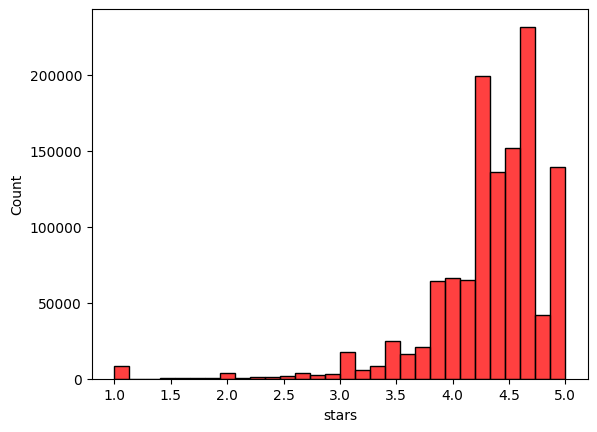

In [49]:
sns.histplot(df['stars'], bins=30, color="red")

### los mas comunes son entre 4,3 y 5 estrellas